In [1]:
#Data Analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

#Read the csv file and look at the first few rows.
df = pd.read_csv("C:\\Users\\Administrator\\Downloads\\BankChurners.csv.zip")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


*We need to check the data-type of features*.

In [2]:
#Checking the data-types
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

*Let’s have a look to the statistical summary about our dataset.*

In [3]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


*If there are missing values in the Dataset before doing any statistical analysis, we need to handle those missing values.*

In [4]:
# Checking the missing values
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

*We have 0 missing values*

In [5]:
#Check for duplicated data

duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


*We have 0 duplicates*

***Data Cleaning***

*Data cleaning is the process of ensuring that your data is correct and useable by identifying any errors in the data, or missing data by correcting or deleting them.*

*We can see that there are two columns at the end of the data set that we can just ignore. We can delete those columns.*

In [6]:
#Dropping the last two columns
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1' ],axis=1)

In [7]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


*Now let's check for outliers*

*Outliers are the values that are far beyond the next nearest data points*.
*There are two types of outliers:*
    
***1. Univariate outliers***: *Univariate outliers are the data points whose values lie beyond the range of expected values based on one variable*.
    
***2. Multivariate outliers***: *While plotting data, some values of one variable may not lie beyond the expected range, but when you plot the data with some other variable, these values may lie far from the expected value*.


***Categorical Ordered Univariate Analysis:***

*Ordered variables are those variables that have a natural rank of order. Some examples of categorical ordered variables from our dataset are:* *Education Level*.    

In [8]:
#calculate the percentage of each education category.
df.Education_Level.value_counts(normalize=True)


Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64

*We can see that the majority of customers at the bank have graduated college*.

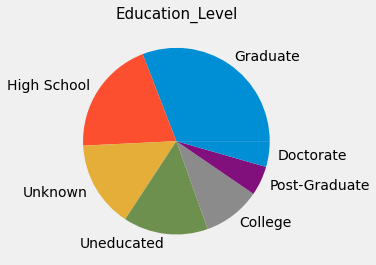

In [9]:
#plot the pie chart of education categories
df.Education_Level.value_counts(normalize=True).plot.pie()
plt.ylabel("",fontsize=15)
plt.title("Education_Level",fontsize=15) 
plt.show()


*This is how we analyze univariate categorical analysis. If the column or variable is of numerical then we’ll analyze by calculating its mean, median, std, etc. We can get those values by using the describe function*.

In [10]:
df.Education_Level.describe()

count        10127
unique           7
top       Graduate
freq          3128
Name: Education_Level, dtype: object

***Bivariate Analysis:***

*If we analyze data by taking two variables/columns into consideration from a dataset, it is known as Bivariate Analysis*.

*A) Numeric-Numeric Analysis:*
    
*Analyzing the two numeric variables from a dataset is known as numeric-numeric analysis. We can analyze it in three different ways.*

*1.Scatter Plot*

*2.Pair Plot*

*3.Correlation Matrix*

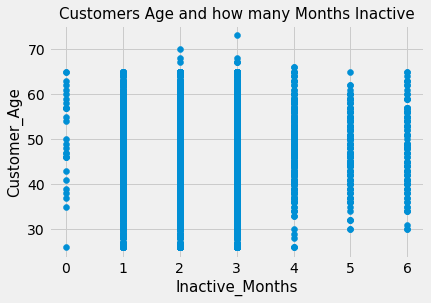

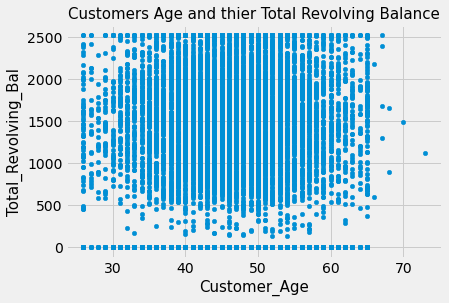

In [11]:
#plot the scatter plot of Inactive_Months and Customer_Age variable in data
plt.scatter(df.Months_Inactive_12_mon,df.Customer_Age)
plt.xlabel("Inactive_Months",fontsize=15)
plt.title("Customers Age and how many Months Inactive", fontsize=15)
plt.ylabel("Customer_Age",fontsize=15)
plt.show()

#plot the scatter plot of Total_Revolving_Bal and Customer_Age variable in data
df.plot.scatter(x="Customer_Age",y="Total_Revolving_Bal")
plt.xlabel("Customer_Age",fontsize=15)
plt.ylabel("Total_Revolving_Bal",fontsize=15)
plt.title("Customers Age and thier Total Revolving Balance", fontsize=15)
plt.show()

***Pair Plot***

*Now, let’s plot Pair Plots for the three columns we used in plotting Scatter plots. We’ll use the seaborn library for plotting Pair Plots.*

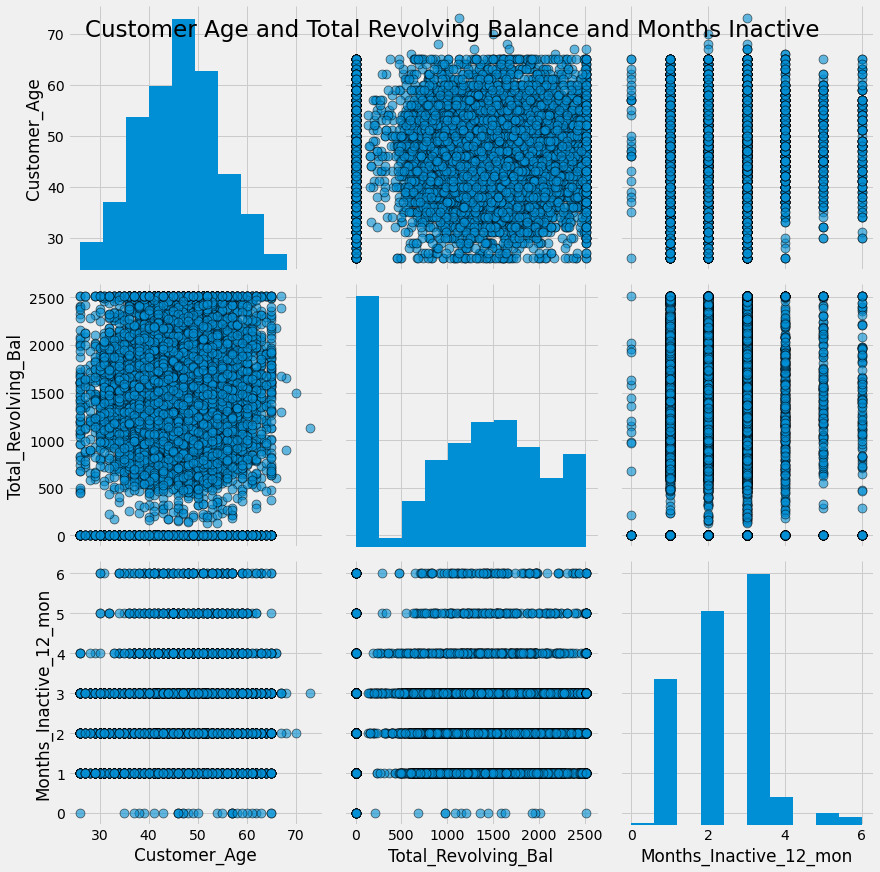

In [12]:
#plot the pair plot of Customer_Age, Total_Revolving_Bal and Months_Inactive in data dataframe.
import seaborn as sns
sns.pairplot(df, 
             vars = ['Customer_Age', 'Total_Revolving_Bal', 'Months_Inactive_12_mon'],
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);
# Title 
plt.suptitle('Customer Age and Total Revolving Balance and Months Inactive', 
             size = 23);

***Correlation Matrix***

*Since we cannot use more than two variables as x-axis and y-axis in Scatter and Pair Plots, it is difficult to see the relation between three numerical variables in a single graph. In those cases, we’ll use the correlation matrix.*


In [13]:
# Creating a matrix using Age, Months_Inactive, Total_Revolving_Balance as rows and columns
df[['Customer_Age','Months_Inactive_12_mon','Total_Revolving_Bal']].corr()



,Customer_Age,Months_Inactive_12_mon,Total_Revolving_Bal
Customer_Age,1.000000,0.054361,0.01478
Months_Inactive_12_mon,0.054361,1.000000,-0.04221
Total_Revolving_Bal,0.014780,-0.042210,1.00000


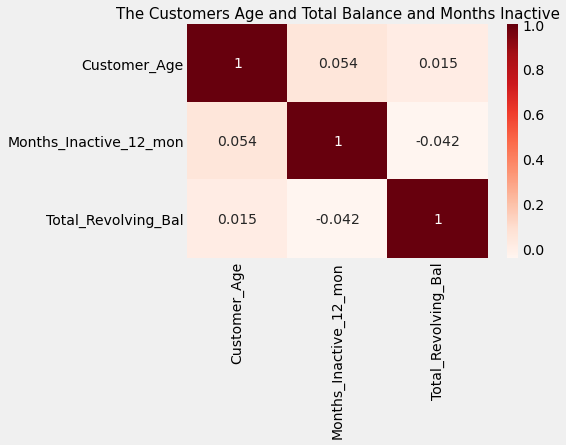

In [14]:
#plot the correlation matrix of Age, Inactive and Revolving_Balance in data dataframe.
sns.heatmap(df[['Customer_Age','Months_Inactive_12_mon','Total_Revolving_Bal']].corr(), annot=True, cmap = 'Reds')
plt.title("The Customers Age and Total Balance and Months Inactive", fontsize =15)
plt.show()

*B) Numeric - Categorical Analysis*

*Analyzing one numeric variable and one categorical variable from a dataset is known as numeric*-*categorical analysis. We analyze them mainly using mean, median, and box plots*.

In [15]:
#groupby the Marital_Status to find the mean of the Total_Revolving_Bal.
df.groupby('Marital_Status')['Total_Revolving_Bal'].mean()

Marital_Status
Divorced    1155.981283
Married     1197.163644
Single      1124.241441
Unknown     1157.748999
Name: Total_Revolving_Bal, dtype: float64

*There is a diffrence between Married or Single and Revolving Balance.*

In [16]:
#groupby the Marital_Status to find the median of the Total_Revolving_Bal.
df.groupby('Marital_Status')['Total_Revolving_Bal'].median()

Marital_Status
Divorced    1281
Married     1308
Single      1235
Unknown     1261
Name: Total_Revolving_Bal, dtype: int64

*Married has the Highest Revolving Balance*

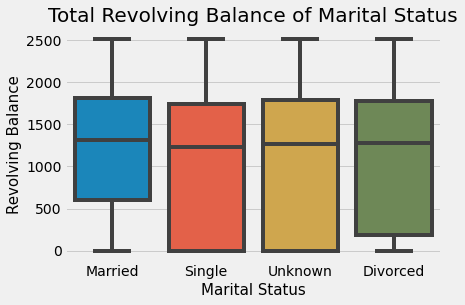

In [17]:
#plot the box plot of Marital_Status and Revolving Balance
sns.boxplot(df.Marital_Status, df.Total_Revolving_Bal)
plt.title("Total Revolving Balance of Marital Status", fontsize =20)
plt.xlabel("Marital Status", fontsize=15)
plt.ylabel("Revolving Balance", fontsize=15)
plt.show()

*As we can see, when we plot the Box Plot,the IQR for customers who are married is slightly higher than those who are single.*
*This is how we analyze Numeric-Categorical variables, we use mean, median, and Box Plots to draw some sort of conclusions*.

*C) Categorical — Categorical Analysis*

*Categorical data is data that classifies an observation as belonging to one or more categories*.

*Let’s see how the churn rate varies from marital status*.

In [18]:
#create Existing Customer numerical data type where Existing Customer is "yes"= 1, "no"= 0

df['Attrition_Flag'] = np.where(df.Attrition_Flag=='Existing Customer',1,0)
df.Attrition_Flag.value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

*Let’s see how existing customers compare to marital status*.

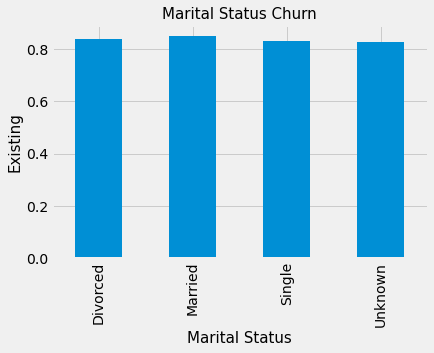

In [19]:
#plot the bar graph of Marital_Status with Attrition_Flag
df.groupby('Marital_Status')['Attrition_Flag'].mean().plot.bar()
plt.ylabel("Existing",fontsize=15)
plt.title("Marital Status Churn", fontsize=15)
plt.xlabel("Marital Status",fontsize=15)
plt.show()

*Not too much of a difference*

***Multivariate Analysis***

*If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis*.

*Let’s see how ‘Education’, ‘Marital Status’, and ‘Months Inactive’ vary with each other*.

*First, we’ll create a pivot table with the three columns and after that, we’ll create a heatmap*.

In [20]:
#create a pivot table
result = pd.pivot_table(data=df, index='Education_Level', columns='Months_Inactive_12_mon',values='Credit_Limit')
print(result)

Months_Inactive_12_mon             0            1            2            3  \
Education_Level                                                               
College                  2007.650000  9130.322936  8915.579495  8467.324691   
Doctorate                4254.000000  7542.591753  9521.348366  8196.595152   
Graduate                10988.042857  8851.338382  8699.497647  8447.518106   
High School              6851.255556  8473.254687  8872.087634  8497.726058   
Post-Graduate           13291.000000  9084.241026  8370.956364  9141.819388   
Uneducated               2065.900000  8844.138835  9500.166598  8879.009582   
Unknown                  5430.325000  8061.381044  8900.590702  8538.387433   

Months_Inactive_12_mon            4            5            6  
Education_Level                                                
College                 8769.104255  5366.886667  6094.777778  
Doctorate               5677.286364  8574.100000  9866.730000  
Graduate                8134.473

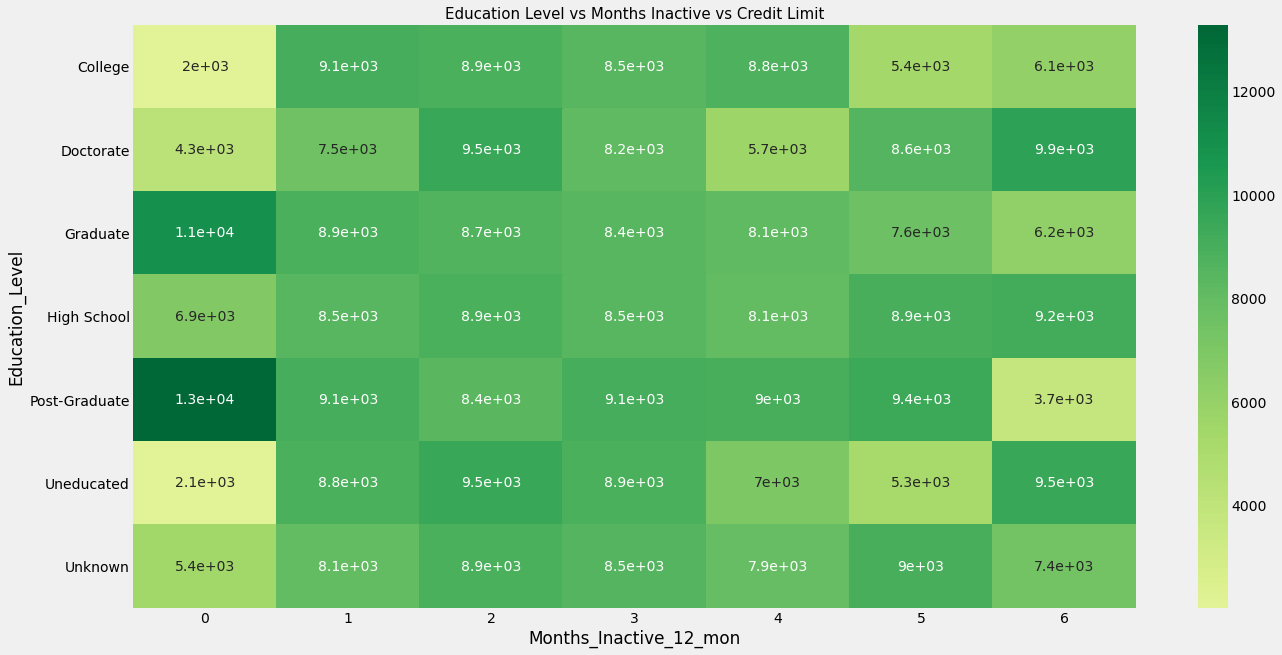

In [21]:
#create heat map of Education vs Months Inactive vs Credit Limit
plt.figure(figsize=(20,10))
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.title("Education Level vs Months Inactive vs Credit Limit", fontsize =15)
plt.show()

*We can see that Post-Graduate has 0 months inactive and also has the highest credit limit*.

Encode Categorical data:

In [22]:
#Incase if user_id is an object:
    
identity = df["CLIENTNUM"]
df = df.drop(columns="CLIENTNUM")

#Convert rest of categorical variable into dummy:
df= pd.get_dummies(df)

#Rejoin userid to dataset:
df = pd.concat([df, identity], axis = 1)

***Split the dataset into dependent and independent variables:*** 
    
*Now we need to separate the dataset into X and y values. y would be the ‘Attrition_Flag’(Churn) column whilst X would be the remaining list of independent variables in the dataset*.

In [23]:
#Identify response variable:
    
response = df["Attrition_Flag"]
df = df.drop(columns="Attrition_Flag")

***Generate training and test datasets:*** 

*Let’s decouple the master dataset into training and test set with an 80%-20% ratio*.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df, response,stratify=response, test_size = 0.2) #use 0.9 if data is huge.random_state = 0
                                                    
#to resolve any class imbalance - use stratify parameter.
                                                    
print(" X_train df: ", X_train.shape)
print(" y_train df: ", y_train.shape)
print(" X_test df: ", X_test.shape)
print(" y_test df: ", y_test.shape)

                                                    


 X_train df:  (8101, 38)
 y_train df:  (8101,)
 X_test df:  (2026, 38)
 y_test df:  (2026,)


***Remove Identifiers:***

Separate ‘CLIENTNUM’ (Customer id) from training and test data frames.

 *We should always check for variables with a correlation above 90 or 95%. They could affect our model as we are giving them a higher weight*.

In [25]:
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] >0.90)]
to_drop

['Avg_Open_To_Buy', 'Gender_M']

In [26]:
train_identity = X_train['CLIENTNUM']
X_train = X_train.drop(columns = ['CLIENTNUM'])
test_identity = X_test['CLIENTNUM']
X_test = X_test.drop(columns = ['CLIENTNUM'])

In [27]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9744,43,2,24,1,1,3,10272.0,1523,8749.0,0.869,14321,113,0.794,0.148,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3314,48,2,44,4,3,3,8904.0,1886,7018.0,0.945,3654,65,0.757,0.212,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
54,56,2,36,1,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
6167,51,0,36,6,3,2,5881.0,0,5881.0,0.710,4431,89,0.816,0.000,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
6923,52,2,43,5,2,3,10351.0,1356,8995.0,0.828,4572,76,1.054,0.131,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


***Model Selection***

***Compare Baseline Classification Algorithms (1st Iteration):***

*Let’s model each classification algorithm over the training dataset and evaluate their accuracy and standard deviation scores.*

*Classification Accuracy is one of the most common classification evaluation metrics to compare baseline algorithms as its the number of correct predictions made as a ratio of total predictions. However, it's not the ideal metric when we have class imbalance issue. Hence, let us sort the results based on the ‘Mean AUC’ value which is nothing but the model’s ability to discriminate between positive and negative classes*.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

log_model = LogisticRegression().fit(X_train, y_train)
knn_model = KNeighborsClassifier().fit(X_train, y_train)
rf_model = RandomForestClassifier().fit(X_train, y_train)
lgbm_model = LGBMClassifier().fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
log_model_score = accuracy_score(y_test, log_model.predict(X_test)) 
knn_model_score = accuracy_score(y_test, knn_model.predict(X_test)) 
rf_model_score = accuracy_score(y_test, rf_model.predict(X_test)) 
lgbm_model_score = accuracy_score(y_test, lgbm_model.predict(X_test)) 

print("Logistic regression accuracy score is: " , log_model_score)
print("KNN accuracy score is: " , knn_model_score)
print("Random forest accuracy score is: " , rf_model_score)
print("LGBM accuracy score is: " , lgbm_model_score)


Logistic regression accuracy score is:  0.8983218163869694
KNN accuracy score is:  0.9027640671273445
Random forest accuracy score is:  0.9644619940769991
LGBM accuracy score is:  0.9743336623889437


In [29]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('LGBM',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))

#Evaluating Model Results:

acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation:

for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=0)
    
# accuracy scoring:

cv_acc_results = model_selection.cross_val_score(  
model, X_train, y_train, cv=kfold, scoring='accuracy')


# roc_auc scoring:

cv_auc_results = model_selection.cross_val_score(  
model, X_train, y_train, cv=kfold, scoring='roc_auc')
acc_results.append(cv_acc_results)
auc_results.append(cv_auc_results)
names.append(name)
model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)



,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Random Forest,98.71,0.4,95.52,0.85


*Check the metrics we have and look at the confusion matrix and ROC curve*

*First we will check KNN*

In [30]:
def display_scores(scores):
    print('Scores',scores)
    print('Mean',scores.mean())
    print('Standard Deviation',scores.std())
    
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [31]:
k = KNeighborsClassifier(metric='manhattan')
k_score = cross_val_score(k, X_train, y_train, cv=5, scoring="accuracy")
display_scores(k_score)

Scores [0.89389266 0.88950617 0.88518519 0.88888889 0.89444444]
Mean 0.8903834700421169
Standard Deviation 0.0034302043047841633


In [32]:
knn = k.fit(X_train,y_train)
knn_pred = knn.predict(X_test)  
print(accuracy_score(y_test, knn_pred))

0.9007897334649556


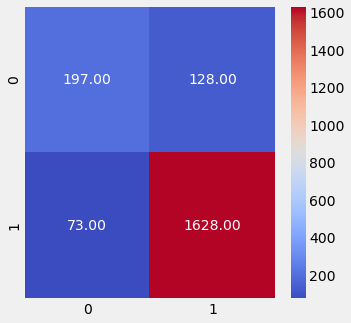

In [33]:
cfm_vpc = confusion_matrix(y_test,knn_pred)
sns.heatmap(cfm_vpc, annot=True,fmt = ".2f", cmap = "coolwarm")
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

0.9271070615034168
0.9570840681951793
0.9418571015331211
0.7816189571745127


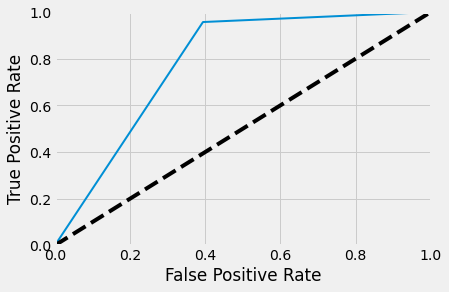

In [34]:
print(precision_score(y_test,knn_pred))
print(recall_score(y_test,knn_pred))
print(f1_score(y_test,knn_pred))
print(roc_auc_score(y_test,knn_pred))
fpr, tpr, thresholds = roc_curve(y_test,knn_pred)
plot_roc_curve(fpr, tpr)
plt.show()

*Check Logistic Regression*

In [35]:
def display_scores(scores):
    print('Scores',scores)
    print('Mean',scores.mean())
    print('Standard Deviation',scores.std())
    
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [36]:
l = LogisticRegression()
log_model_score = cross_val_score(l, X_train, y_train, cv=5, scoring="accuracy")
display_scores(log_model_score)





Scores [0.88093769 0.8882716  0.86975309 0.88518519 0.87592593]
Mean 0.8800146990502737
Standard Deviation 0.006599713608711389


In [37]:
lgr = l.fit(X_train,y_train)
lgr_pred = lgr.predict(X_test)
print(accuracy_score(y_test, lgr_pred))



0.8983218163869694


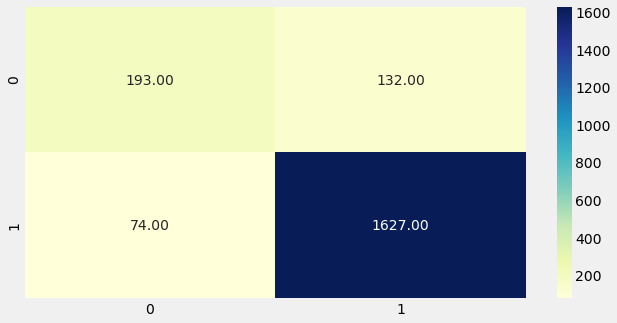

In [38]:
mnj_cnj = confusion_matrix(y_test,lgr_pred)
sns.heatmap(mnj_cnj, annot=True,fmt = ".2f", cmap="YlGnBu")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()






0.9249573621375782
0.956496178718401
0.9404624277456647
0.7751711662822774


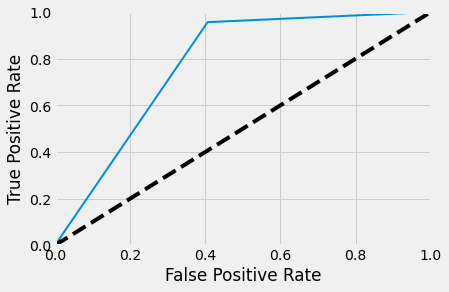

In [39]:
print(precision_score(y_test,lgr_pred))
print(recall_score(y_test,lgr_pred))
print(f1_score(y_test,lgr_pred))
print(roc_auc_score(y_test,lgr_pred))
fpr, tpr, thresholds = roc_curve(y_test,lgr_pred)
plot_roc_curve(fpr, tpr)
plt.show()

*Check Gaussian NB*

In [40]:
gnb = GaussianNB()
gnb_model_score = cross_val_score(gnb, X_train, y_train, cv=5, scoring="accuracy")
display_scores(gnb_model_score)


Scores [0.89450956 0.88641975 0.89753086 0.89012346 0.8845679 ]
Mean 0.8906303074614816
Standard Deviation 0.004845714272241162


In [41]:

gnb = GaussianNB().fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print(accuracy_score(y_test, gnb_pred))


0.9042448173741362


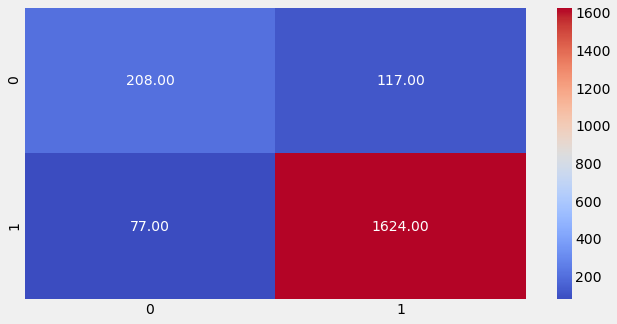

In [42]:
gnbc = confusion_matrix(y_test,gnb_pred)
sns.heatmap(gnbc, annot=True,fmt = ".2f", cmap="coolwarm")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()


0.9327972429638139
0.9547325102880658
0.9436374201045904
0.7973662551440329


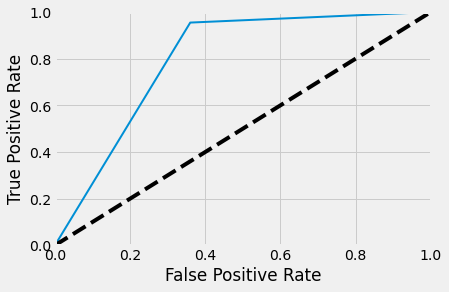

In [43]:
print(precision_score(y_test,gnb_pred))
print(recall_score(y_test,gnb_pred))
print(f1_score(y_test,gnb_pred))
print(roc_auc_score(y_test,gnb_pred))
fpr, tpr, thresholds = roc_curve(y_test,gnb_pred)
plot_roc_curve(fpr, tpr)
plt.show()

*Check DecisionTreeClassifier*

In [44]:
dtc = DecisionTreeClassifier()
dtc_model_score = cross_val_score(dtc, X_train, y_train, cv=5, scoring="accuracy")
display_scores(dtc_model_score)

Scores [0.93522517 0.92901235 0.93888889 0.93703704 0.93024691]
Mean 0.9340820709667101
Standard Deviation 0.0038354802640980716


In [45]:
d_tc = DecisionTreeClassifier().fit(X_train,y_train)
ctd_pred = d_tc.predict(X_test)
print(accuracy_score(y_test, ctd_pred))


0.9304047384007897


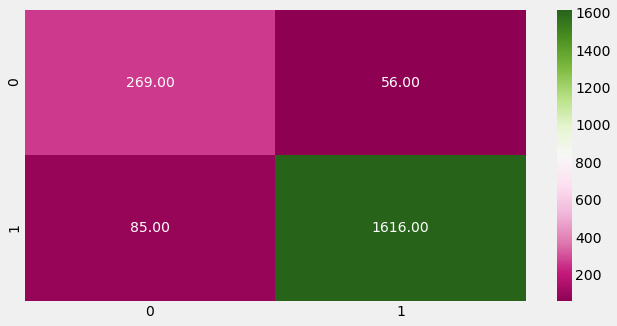

In [46]:
bmb = confusion_matrix(y_test,ctd_pred)
sns.heatmap(bmb, annot=True,fmt = ".2f", cmap="PiYG")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()


0.9665071770334929
0.9500293944738389
0.9581974503409427
0.8888608510830733


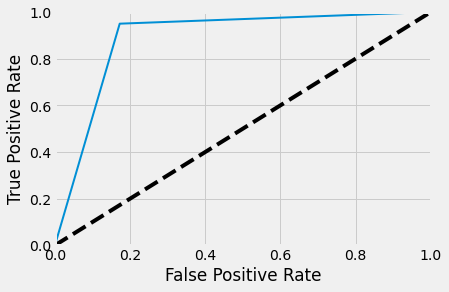

In [47]:
print(precision_score(y_test,ctd_pred))
print(recall_score(y_test,ctd_pred))
print(f1_score(y_test,ctd_pred))
print(roc_auc_score(y_test,ctd_pred))
fpr, tpr, thresholds = roc_curve(y_test,ctd_pred)
plot_roc_curve(fpr, tpr)
plt.show()

*Check Random Forest*

In [48]:
rf = RandomForestClassifier()
rf_model_score = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy")
display_scores(rf_model_score)

Scores [0.95249846 0.95061728 0.95925926 0.95987654 0.95246914]
Mean 0.9549441359928714
Standard Deviation 0.0038412900542048084


In [51]:
rfc = RandomForestClassifier().fit(X_train,y_train)
rf_pred = rfc.predict(X_test)
print(accuracy_score(y_test, rf_pred))


0.9610069101678184


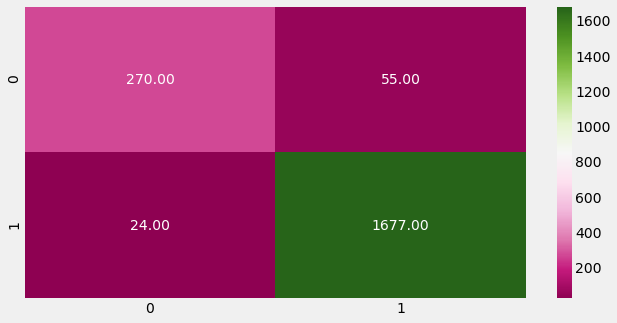

In [53]:
lfs = confusion_matrix(y_test,rf_pred)
sns.heatmap(lfs, annot=True,fmt = ".2f", cmap="PiYG")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()


0.9682448036951501
0.9858906525573192
0.9769880570929216
0.908329941663275


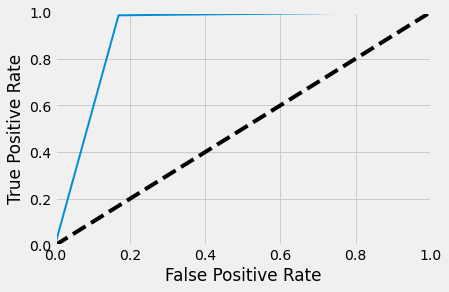

In [56]:
print(precision_score(y_test,rf_pred))
print(recall_score(y_test,rf_pred))
print(f1_score(y_test,rf_pred))
print(roc_auc_score(y_test,rf_pred))
fpr, tpr, thresholds = roc_curve(y_test,rf_pred)
plot_roc_curve(fpr, tpr)
plt.show()

 ***Get the right parameters for the baseline models***:
 
*Let’s optimize the parameters and finalize the evaluation metrics for model selection*.

***Identify the optimal number for Random Forest Model***: 

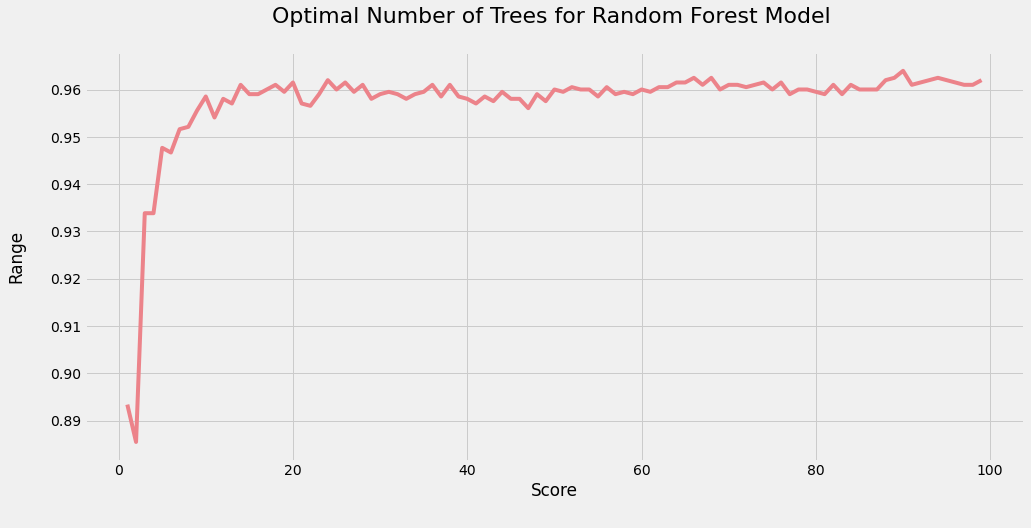

In [57]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()





*The optimal number for this model would be 87*

***Identify the optimal number of K neighbors for KNN Model***: 

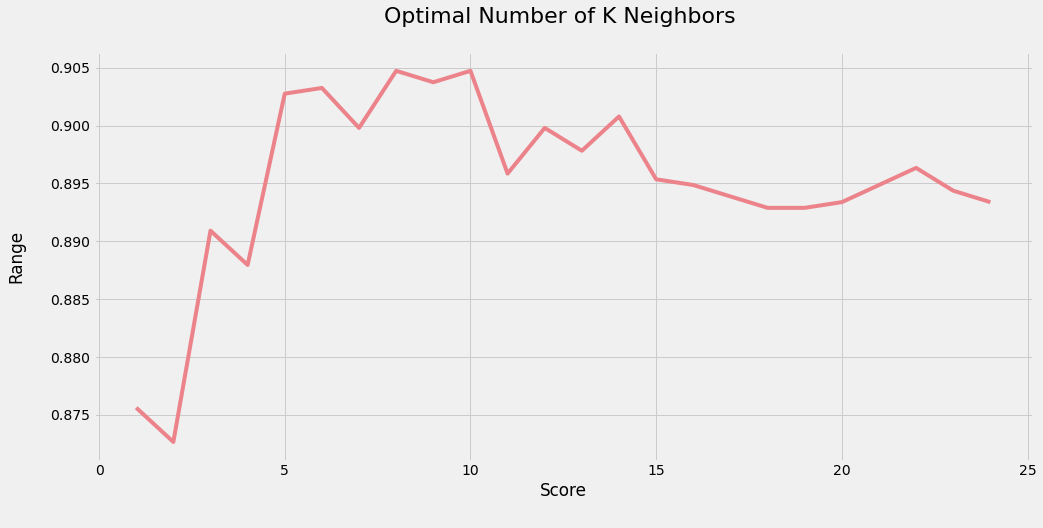

In [58]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

*As we can see from the above iterations, we will get the maximum score of 90.5%*.

***Logistic Regression:***

In [59]:
# Fitting Logistic Regression to the Training set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results

y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.898322   0.924957  0.956496  0.940462  0.950018


***K-Nearest Neighbors:***

In [62]:
# Fitting KNN to the Training set:

classifier = KNeighborsClassifier(
n_neighbors = 22, 
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results 

y_pred  = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.898322   0.924957  0.956496  0.940462  0.950018
1          SVM (Linear)  0.898322   0.924957  0.956496  0.940462  0.950018
2  K-Nearest Neighbours  0.896347   0.922380  0.957084  0.939411  0.949936


***Support Vector Machine (linear classifier):***

In [63]:
# Fitting SVM (SVC class) to the Training set

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results y_pred = classifier.predict(X_test)
#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame(
[['SVM (Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.898322   0.924957  0.956496  0.940462  0.950018
1          SVM (Linear)  0.898322   0.924957  0.956496  0.940462  0.950018
2  K-Nearest Neighbours  0.896347   0.922380  0.957084  0.939411  0.949936
3          SVM (Linear)  0.896347   0.922380  0.957084  0.939411  0.949936


***Kernel SVM:***

In [64]:
# Fitting Kernel SVM to the Training set:

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 

y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Kernel SVM', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)


                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.898322   0.924957  0.956496  0.940462  0.950018
1          SVM (Linear)  0.898322   0.924957  0.956496  0.940462  0.950018
2  K-Nearest Neighbours  0.896347   0.922380  0.957084  0.939411  0.949936
3          SVM (Linear)  0.896347   0.922380  0.957084  0.939411  0.949936
4            Kernel SVM  0.839585   0.839585  1.000000  0.912798  0.963194


***Naive Byes:***

In [65]:
# Fitting Naive Byes to the Training set:

classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results 

y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
5            Naive Byes  0.904245   0.932797  0.954733  0.943637  0.950263
0   Logistic Regression  0.898322   0.924957  0.956496  0.940462  0.950018
1          SVM (Linear)  0.898322   0.924957  0.956496  0.940462  0.950018
2  K-Nearest Neighbours  0.896347   0.922380  0.957084  0.939411  0.949936
3          SVM (Linear)  0.896347   0.922380  0.957084  0.939411  0.949936
4            Kernel SVM  0.839585   0.839585  1.000000  0.912798  0.963194


***Decision Tree:***

In [66]:
# Fitting Decision Tree to the Training set:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 

y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
6         Decision Tree  0.948174   0.968310  0.970018  0.969163  0.969676
0            Naive Byes  0.904245   0.932797  0.954733  0.943637  0.950263
1   Logistic Regression  0.898322   0.924957  0.956496  0.940462  0.950018
2          SVM (Linear)  0.898322   0.924957  0.956496  0.940462  0.950018
3  K-Nearest Neighbours  0.896347   0.922380  0.957084  0.939411  0.949936
4          SVM (Linear)  0.896347   0.922380  0.957084  0.939411  0.949936
5            Kernel SVM  0.839585   0.839585  1.000000  0.912798  0.963194


***Random Forest:***

In [68]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 87, 
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix 
accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0         Decision Tree  0.948174   0.968310  0.970018  0.969163  0.969676
7         Random Forest  0.959033   0.966014  0.985891  0.975851  0.981850
1            Naive Byes  0.904245   0.932797  0.954733  0.943637  0.950263
2   Logistic Regression  0.898322   0.924957  0.956496  0.940462  0.950018
3          SVM (Linear)  0.898322   0.924957  0.956496  0.940462  0.950018
4  K-Nearest Neighbours  0.896347   0.922380  0.957084  0.939411  0.949936
5          SVM (Linear)  0.896347   0.922380  0.957084  0.939411  0.949936
6            Kernel SVM  0.839585   0.839585  1.000000  0.912798  0.963194


**we can definitely conclude that Random Forest is an optimal model of choice for the given dataset as it has relatively the highest combination of accuracy,recall and F2 scores; giving most number of correct positive predictions while minimizing the false negatives.** 

**let's try to use Random Forest and evaluate its performance in the forthcoming sections.**


***Model Evaluation:***

***Train & evaluate Chosen Model:*** 
*Let’s fit the selected model (Random Forest in this case) on the training dataset and evaluate the results.*

In [70]:
classifier = RandomForestClassifier(random_state = 0)
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['RandomForestClassifier',
acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                    Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  RandomForestClassifier    0.9615   0.967185  0.987654  0.977312  0.983491


***k-Fold Cross-Validation:***
    
*Model evaluation is most commonly done through ‘K- fold Cross-Validation’ technique that primarily helps us to fix the variance. Variance problem occurs when we get good accuracy while running the model on a training set and a test set but then the accuracy looks different when the model is run on another test set.*

*So, in order to fix the variance problem, k-fold cross-validation basically split the training set into 10 folds and train the model on 9 folds (9 subsets of the training dataset) before testing it on the test fold. This gives us the flexibility to train our model on all ten combinations of 9 folds; giving ample room to finalize the variance.*

In [72]:
accuracies = cross_val_score(estimator = classifier,
X = X_train, y = y_train, cv = 10)
print(" Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), 
accuracies.std() * 2))

 Random Forest Classifier Accuracy: 0.96 (+/- 0.02)


*k-fold Cross Validation results indicate that we would have an accuracy anywhere between 94% to 98% while running this model on any test set.*

***Visualize results on a Confusion Matrix:*** 

Text(0.5, -1.340000000000014, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

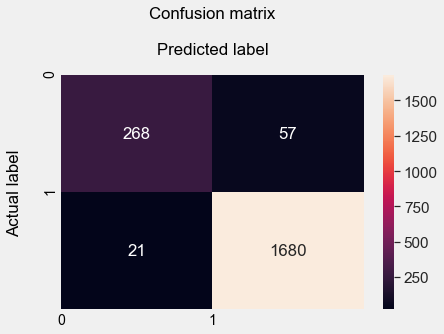

In [73]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')#,cmap="YlGnBu" 
           
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

*The Confusion matrix indicates that we have 1680+268 correct predictions and 21+57 incorrect predictions.
Accuracy rate = number of correct predictions/ total predictions * 100
Error rate = Number of wrong predictions / total predictions * 100
We have got an accuracy of 96%; signalling the characteristics of a reasonably good model*.

***Evaluate the model using ROC Graph:***

*It’s good to re-evaluate the model using ROC Graph. ROC Graph shows us the capability of a model to distinguish between the classes based on the AUC Mean score. The orange line represents the ROC curve of a random classifier while a good classifier tries to remain as far away from that line as possible. As shown in the graph below, the fine-tuned Logistic Regression model showcased a higher AUC score.*

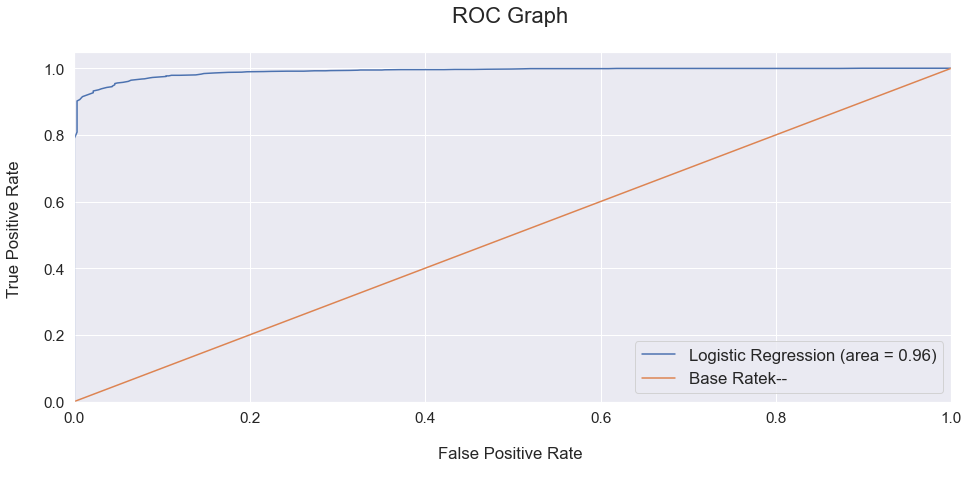

In [74]:
classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC

plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC

plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

***Model Improvement:***

In [101]:
# Round 1:
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [102]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 14.8min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [103]:
best_grid = grid_search.best_estimator_

In [104]:
#Best parameters for this model
best_grid

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8)

In [109]:
#Run the model again with these parameters
final = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=110, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False).fit(X_train,y_train)

In [110]:
final_pred = final.predict(X_test)
print(accuracy_score(y_test, final_pred))

0.9333662388943732


***Compare predictions against the test set:***

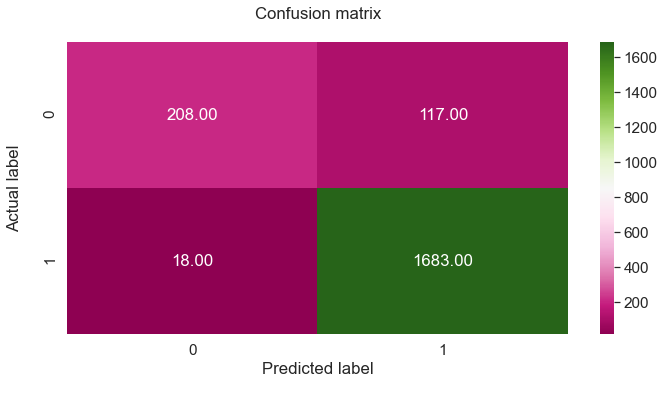

In [112]:
lfs2 = confusion_matrix(y_test,final_pred)
sns.heatmap(lfs2, annot=True,fmt = ".2f", cmap="PiYG")
fig=plt.gcf()
plt.title('Confusion matrix\n', y=1.1)
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
fig.set_size_inches(10,5)
plt.show()

***Format Final Results:***

*Unpredictability and risk are the close companions of any predictive models. Therefore in the real world, its always a good practice to build a absolute predicted outcome. 1's represent a 'churn' and a 0 represents a 'non churn'.*

In [118]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred

final_results["propensity_to_churn(%)"] =  y_test
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['CLIENTNUM', 'Attrition_Flag', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)


      CLIENTNUM  Attrition_Flag  predictions  propensity_to_churn(%) Ranking
1987  793355508               1            1                     100       9
3398  812449758               0            0                       0      10
9405  712517808               1            1                     100       9
9695  712441308               0            0                       0      10
9249  712833633               1            1                     100       9
...         ...             ...          ...                     ...     ...
9942  710590683               0            1                       0       9
3850  712470033               1            1                     100       1
3656  778710783               1            1                     100       1
4408  809978733               1            1                     100       1
3599  714907908               1            1                     100       1

[2026 rows x 5 columns]


***Model Deployment***


*We can run the model over any new dataset to predict the probability of any customer to churn in months to come.*

***Conclusion***


*We made use of a customer churn dataset from Kaggle to build a machine learning classifier that predicts the propensity of any customer to churn in months to come with a reasonable accuracy score of 94% to 98%.*
